<a href="https://colab.research.google.com/github/vihaannnn/AI-Allignment-Research/blob/master/Submissions/Vihaan_Nama_interpretable_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook aims to predict a telecommunications company's Churn based on the kaggle dataset - https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code

We use 3 models to predict these values - Linear Regression, Logistic Regression, and GAM

Please remember to add the data present in the same folder to the files here. Name the data "Churn.csv"

The Help of Perplexity AI and google Gemini was used for the creation of this notebook
Also various resources from our classes at Duke University

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install pygam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [42]:
!wget https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code

--2024-09-19 02:25:19--  https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘code’

code                    [ <=>                ]   9.85K  --.-KB/s    in 0s      

2024-09-19 02:25:19 (74.5 MB/s) - ‘code’ saved [10083]



In [3]:
df = pd.read_csv("Churn.csv")
print(df)

In [20]:
#Dropped any rows with NaN values
df = df.dropna(axis = 0, how = 'all')

In [5]:
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#dropped the customer ID Column as it has no value to the Churn
print(df.columns)
df.drop(['customerID'], axis=1, inplace=True)
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [8]:
#Certain columns require label encoding while others require one hot encoding and some dont need any type of encoding. We are splitting this accordingly

columns_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService',  'PaperlessBilling', 'Churn']
columns_to_one_hot_encode = ['MultipleLines', 'Contract', 'PaymentMethod','OnlineSecurity', 'InternetService', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
normal_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [9]:
df_columns_to_encode = df[columns_to_encode]
df_columns_to_one_hot_encode = df[columns_to_one_hot_encode]
df_normal_columns = df[normal_columns]

In [10]:
le = LabelEncoder()

# Apply label encoding to specified columns
df_columns_to_encode[columns_to_encode] = df_columns_to_encode[columns_to_encode].apply(lambda col: le.fit_transform(col))

<ipython-input-10-ba254c711e48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_columns_to_encode[columns_to_encode] = df_columns_to_encode[columns_to_encode].apply(lambda col: le.fit_transform(col))


In [11]:
encoder = OneHotEncoder(sparse=False)
# Assuming 'df' is your DataFrame and 'columns_to_encode' is a list of column names
encoded_columns = encoder.fit_transform(df_columns_to_one_hot_encode[columns_to_one_hot_encode])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_one_hot_encode))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
df_columns_to_encode.head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,1,1
3,1,0,0,0,0,0
4,0,0,0,1,1,1


In [13]:
encoded_df.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [14]:
#Concat all the Dataframes together
df_encoded_combined = pd.concat([encoded_df, df_normal_columns, df_columns_to_encode], axis=1)
df_encoded_combined.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1,29.85,29.85,0,1,0,0,1,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,34,56.95,1889.5,1,0,0,1,0,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2,53.85,108.15,1,0,0,1,1,1
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,45,42.30,1840.75,1,0,0,0,0,0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2,70.70,151.65,0,0,0,1,1,1


In [21]:
#Here we are dropping any rows which have cells equal to a single space
df_cleaned = df_encoded_combined[~df_encoded_combined.applymap(lambda x: x == ' ').any(axis=1)]

<ipython-input-21-00a605a14d9b>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df_encoded_combined[~df_encoded_combined.applymap(lambda x: x == ' ').any(axis=1)]


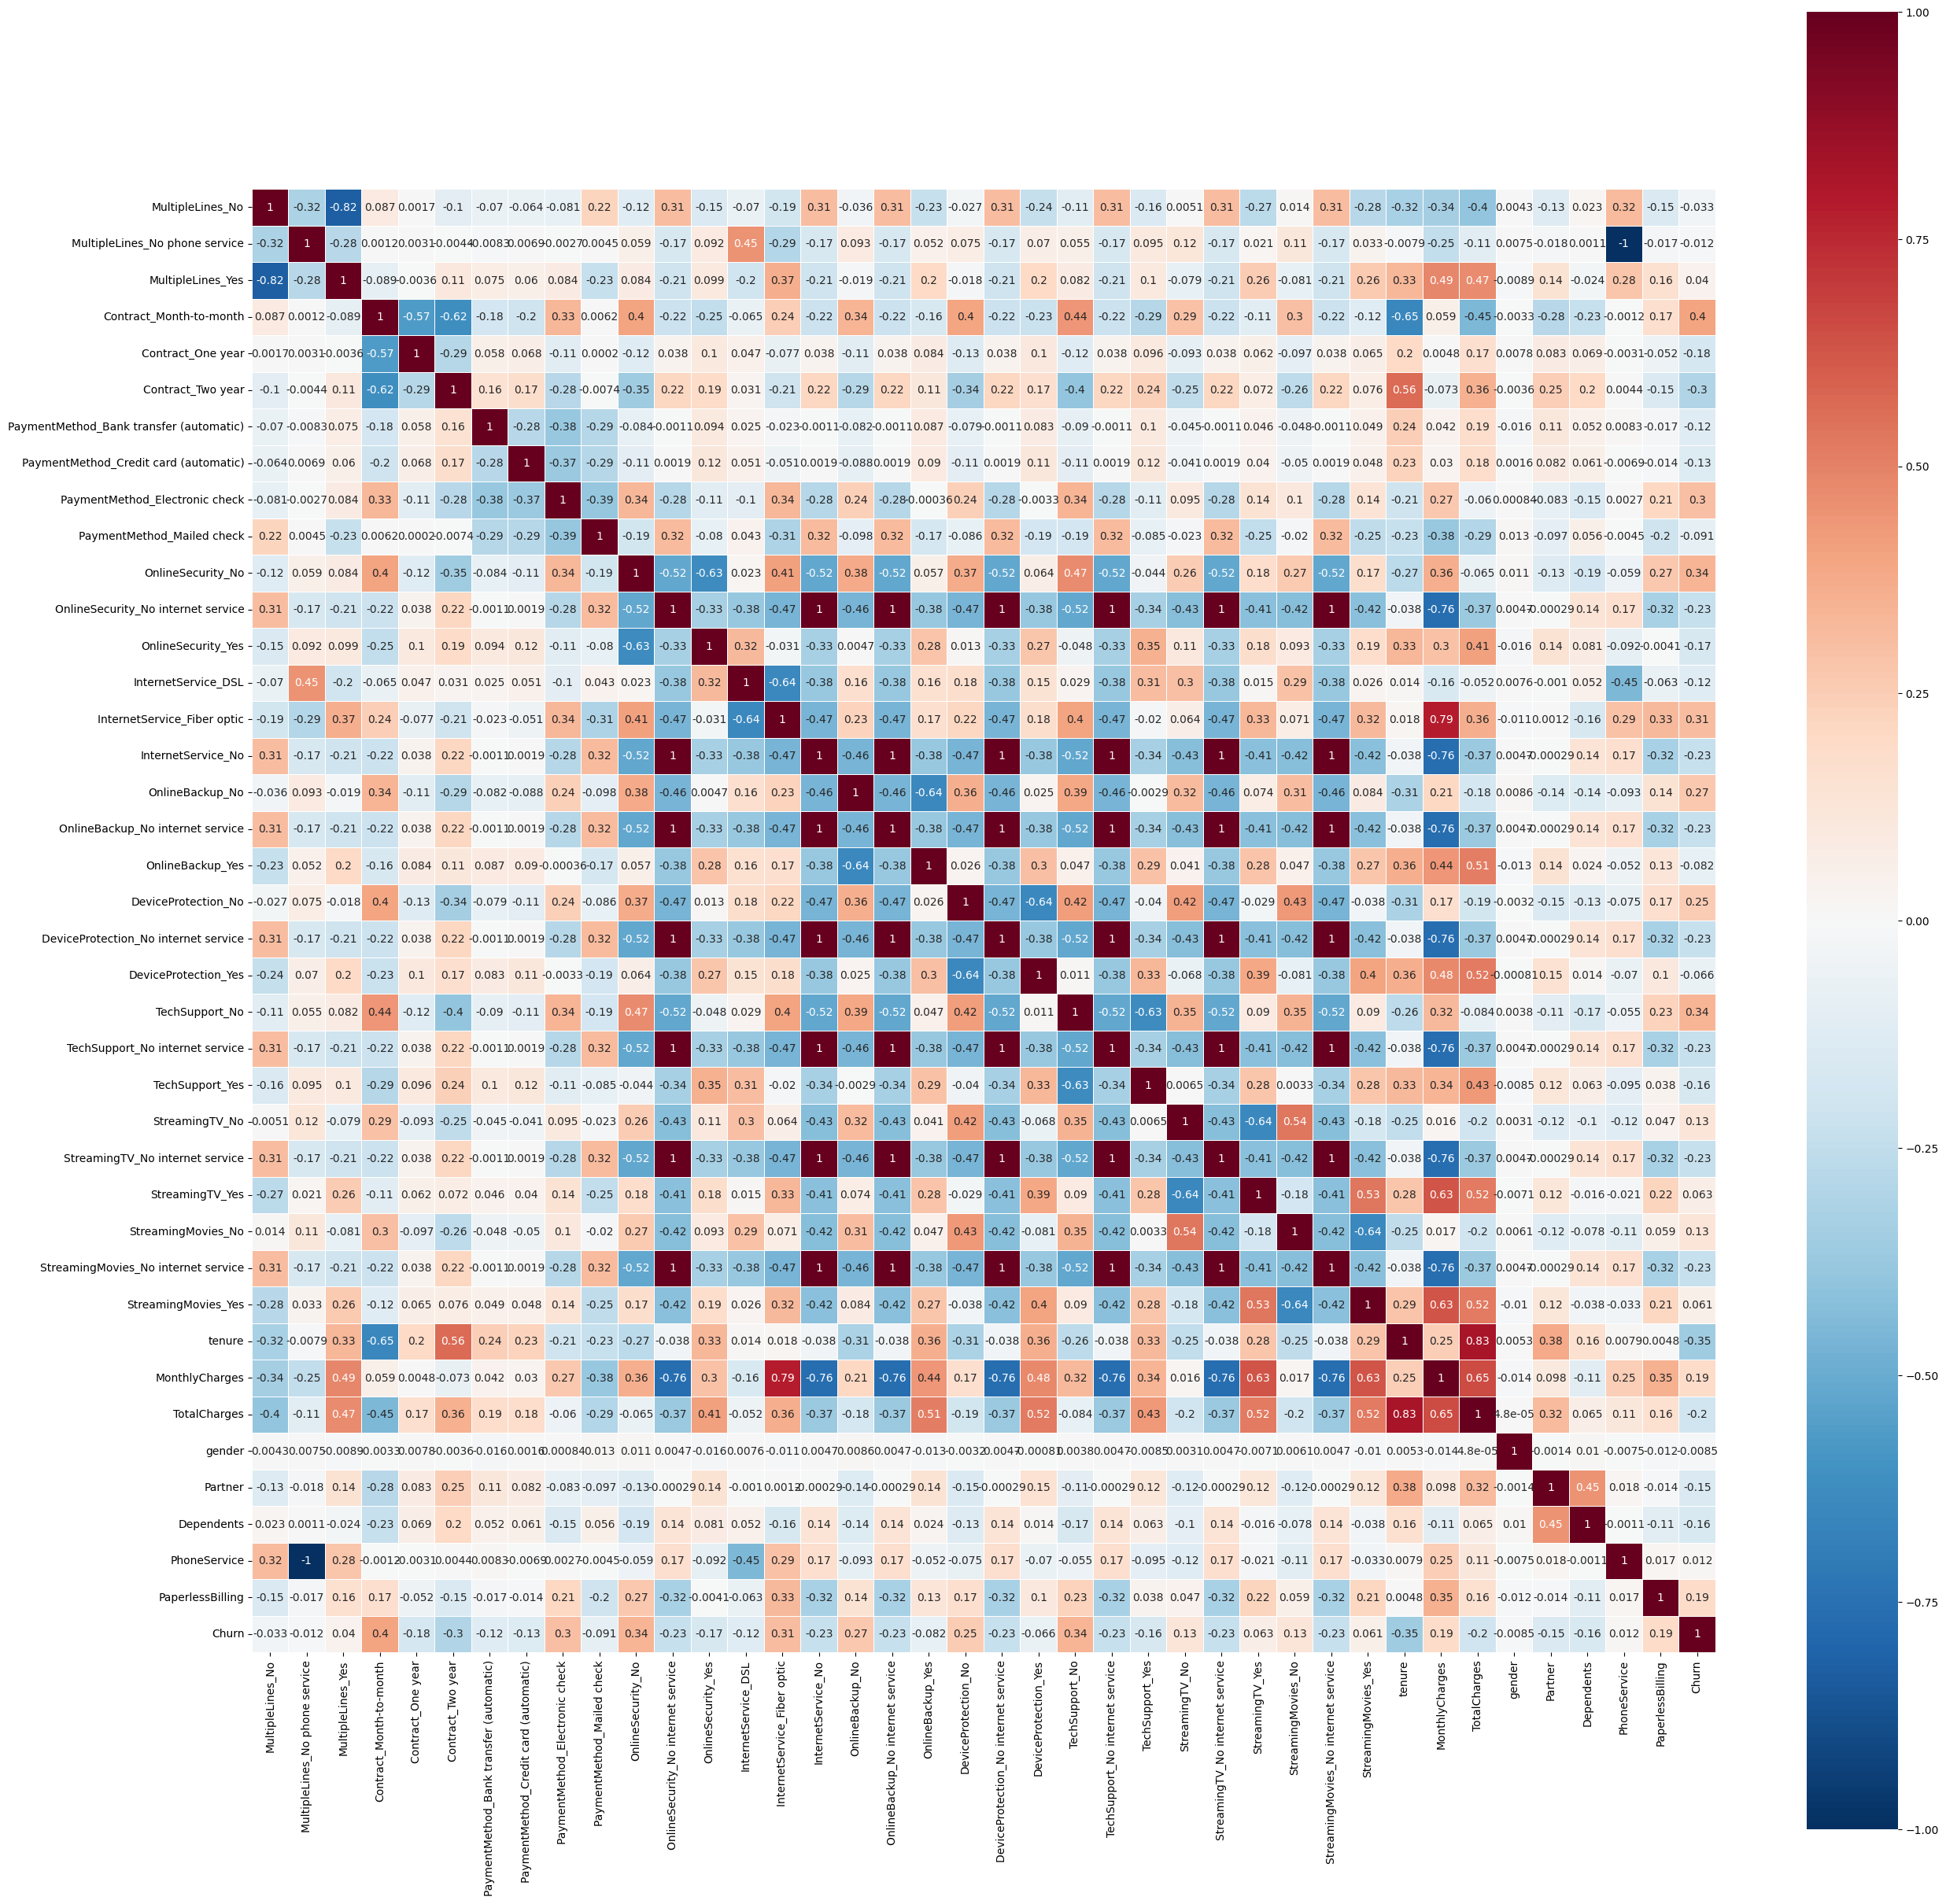

In [16]:
# Examine correlations between variables using correlation matrix
plt.figure(figsize=(30,30))
cm = df_cleaned.corr(method='pearson')
sns.heatmap(cm, annot=True, cmap = 'RdBu_r',linewidth=0.5,square=True)
plt.show()

There is clear dependence and correlation of the variables on one another. We are going tp drop the columns - 'MultipleLines_No phone service', 'StreamingMovies_No internet service',  'OnlineSecurity_No internet service','StreamingTV_No internet service', 'TechSupport_No internet service', 'DeviceProtection_No internet service', 'OnlineBackup_No internet service' as clearly they have already been accounted for in the cell - PhoneService and InternetService_No


Since we already have values representing Internet service and phone service, we do not need the created columns which show the relationship between the internet/phone service not being there for each property



In [17]:
#Dropping the derived values
df_cleaned.drop(['MultipleLines_No phone service', 'StreamingMovies_No internet service',  'OnlineSecurity_No internet service','StreamingTV_No internet service', 'TechSupport_No internet service', 'DeviceProtection_No internet service', 'OnlineBackup_No internet service'], axis = 1, inplace = True)

<ipython-input-17-587a8ddd9404>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['MultipleLines_No phone service', 'StreamingMovies_No internet service',  'OnlineSecurity_No internet service','StreamingTV_No internet service', 'TechSupport_No internet service', 'DeviceProtection_No internet service', 'OnlineBackup_No internet service'], axis = 1, inplace = True)


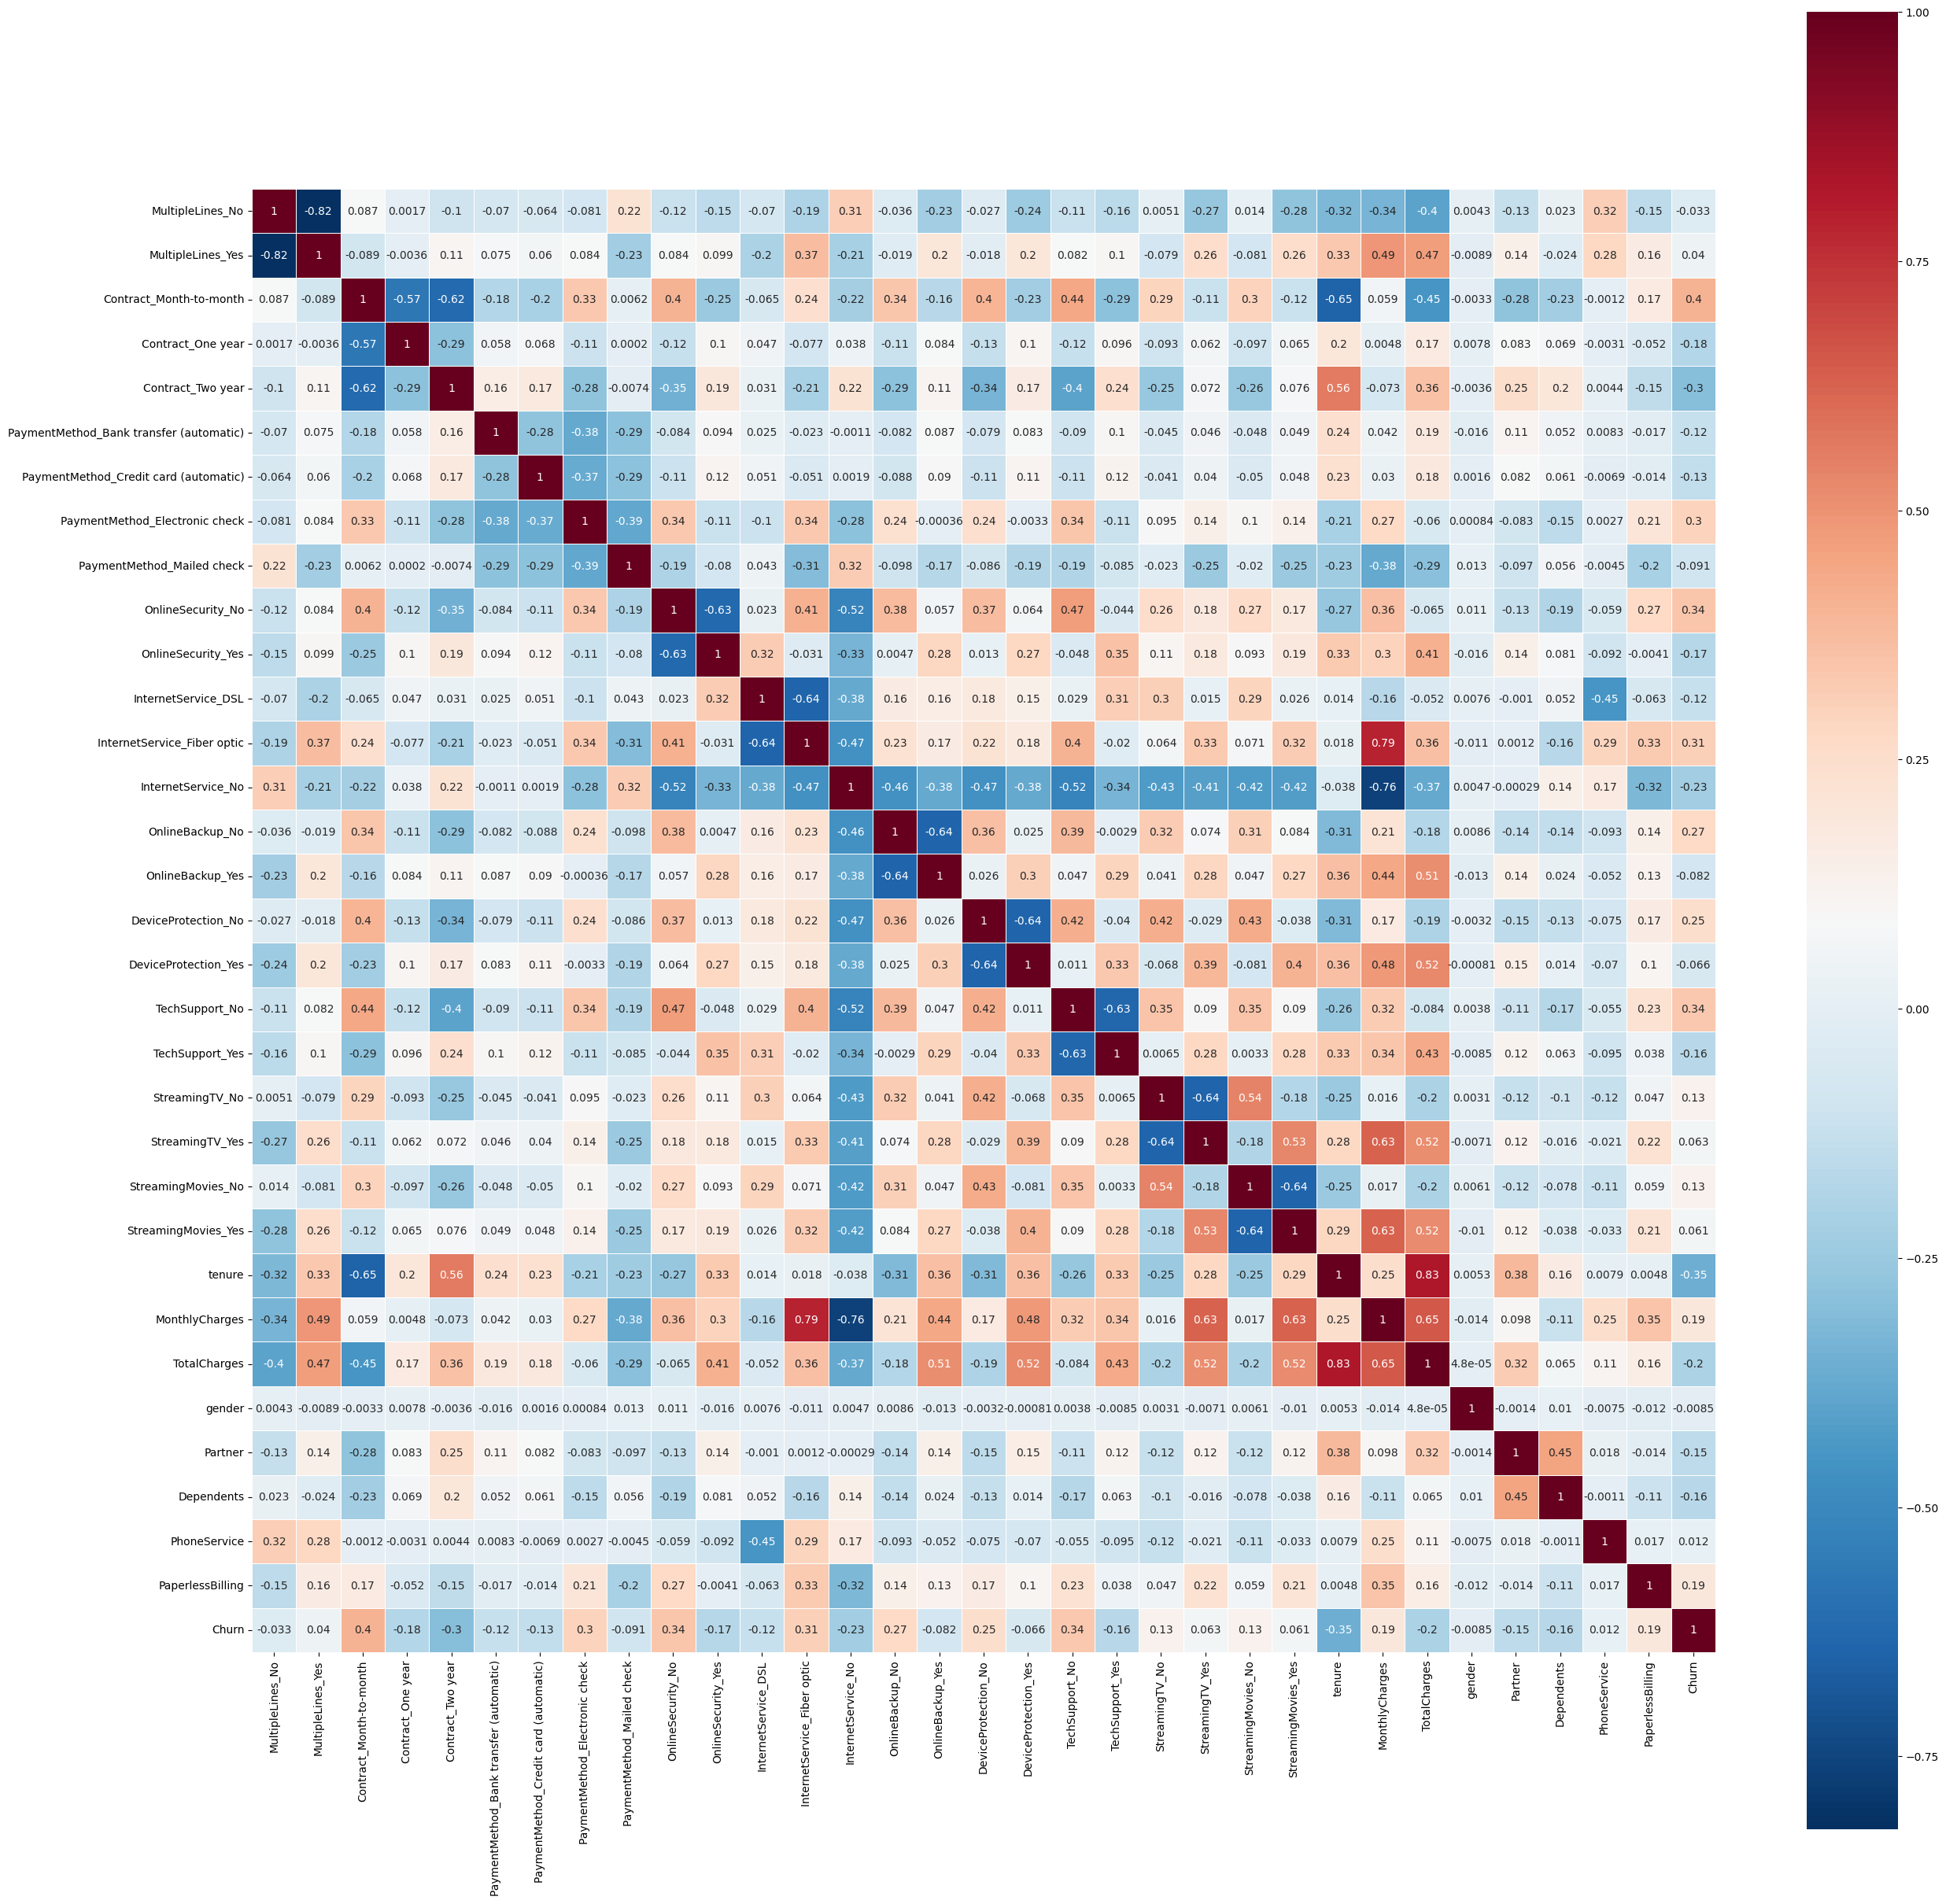

In [18]:
# Examine correlations between variables using correlation matrix
plt.figure(figsize=(30,30))
cm = df_cleaned.corr(method='pearson')
sns.heatmap(cm, annot=True, cmap = 'RdBu_r',linewidth=0.5,square=True)
plt.show()
#Below Coreelation matrix shows no complete dependencies

In [22]:
X = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']
# Step 1: Split the data into train+validation and test sets
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=422)


# Step 2: Split the train+validation set into separate train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Step 3: Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#Convert back to pandas DF
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Assuming you have your model predictions in y_pred and true values in y_true
# These could be from your validation set, for example: y_pred = model.predict(X_val)

def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("Regression Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2) Score: {r2:.4f}")





In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import numpy as np

# Assuming you have your model predictions in y_pred and true values in y_true
# These could be from your validation set, for example: y_pred = model.predict(X_val)

def classification_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print("Classification Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(cm)



Assumptions-
* Linearity - For linear classifiers they make the assumption that the decision boundary between classes can
* Independence - All data points are independent of each other as one data point does not influence the other
* Homoscedasticity - Tested for after model training
* Normality - Values are normalised
* No multicollinearity - As we can see the above data was cleaned such that the data terms are almost free from collinearity shown in the collinearity plot
* No autocorrelation - has to be done after calculating the residuals
* Large enough sample size - 7043 - large enough

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Initialize the model
model = LinearRegression()

# 2. Train the model
model.fit(X_train_scaled, y_train)

# 3. Make predictions on training and validation sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)


# 6. Examine coefficients and intercept
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coefficients)
print(f"\nIntercept: {model.intercept_}")

print("Regression Metrics")
regression_metrics(y_test, y_test_pred)

residuals_linear_regression = y_test - y_test_pred
print("\n\n\nClassification Metrics")
y_pred_classification = np.where(y_test_pred < 0.5, 0, 1)
classification_metrics(y_test, y_pred_classification)


Model Coefficients:
                                    Feature   Coefficient
0                          MultipleLines_No -1.185044e+12
1            MultipleLines_No phone service  5.813441e+11
2                         MultipleLines_Yes -1.171837e+12
3                   Contract_Month-to-month -1.337330e+11
4                         Contract_One year -1.090936e+11
5                         Contract_Two year -1.148368e+11
6   PaymentMethod_Bank transfer (automatic)  1.231586e+12
7     PaymentMethod_Credit card (automatic)  1.241836e+12
8            PaymentMethod_Electronic check  1.416830e+12
9                PaymentMethod_Mailed check  1.262582e+12
10                        OnlineSecurity_No  3.493926e+12
11       OnlineSecurity_No internet service -4.185274e+11
12                       OnlineSecurity_Yes  3.164946e+12
13                      InternetService_DSL -2.784887e+12
14              InternetService_Fiber optic -2.911983e+12
15                       InternetService_No  2.1487

In [40]:
from sklearn.linear_model import LogisticRegression

# 1. Initialize the model
model = LogisticRegression(random_state=42)

# 2. Train the model
model.fit(X_train_scaled, y_train)

# 3. Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

coefficients = model.coef_[0]
feature_names = X_train_scaled.columns

# Create a DataFrame of features and their coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})



# Reset index for better display
coef_df = coef_df.reset_index(drop=True)

# Display the coefficients
print("\nModel Coefficients:")
print(coef_df)

# Get the intercept
intercept = model.intercept_[0]
print(f"\nIntercept: {intercept}")

# 4. Evaluate the model
print("Classification Metrics")
classification_metrics(y_test, y_test_pred)

residuals_logistic_regression = y_test - y_test_pred



Model Coefficients:
                                    Feature  Coefficient
0                          MultipleLines_No    -0.083564
1            MultipleLines_No phone service     0.021272
2                         MultipleLines_Yes     0.071748
3                   Contract_Month-to-month     0.317266
4                         Contract_One year    -0.025944
5                         Contract_Two year    -0.344825
6   PaymentMethod_Bank transfer (automatic)    -0.032251
7     PaymentMethod_Credit card (automatic)    -0.049297
8            PaymentMethod_Electronic check     0.119705
9                PaymentMethod_Mailed check    -0.054383
10                        OnlineSecurity_No     0.107089
11       OnlineSecurity_No internet service    -0.072254
12                       OnlineSecurity_Yes    -0.052728
13                      InternetService_DSL    -0.255221
14              InternetService_Fiber optic     0.303812
15                       InternetService_No    -0.072254
16        

In [41]:
from pygam import GAM, s
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled are already defined
# and X_train_scaled has 32 features

# Create the GAM model
gam = GAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) +
          s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) +
          s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) +
          s(24) + s(25) + s(26) + s(27) + s(28) + s(29) + s(30) + s(31))

# Fit the model
gam.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = gam.predict(X_train_scaled)
y_test_pred = gam.predict(X_test_scaled)

print("GAM Metrics")
regression_metrics(y_test, y_test_pred)


residuals_GAM = y_test - y_test_pred

print("\n\n\nClassification Metrics")
y_pred_classification = np.where(y_test_pred < 0.5, 0, 1)
classification_metrics(y_test, y_pred_classification)

print(gam.summary())

GAM Metrics
Regression Metrics:
Mean Squared Error (MSE): 0.1327
Root Mean Squared Error (RMSE): 0.3643
Mean Absolute Error (MAE): 0.2898
R-squared (R2) Score: 0.2965



Classification Metrics
Classification Metrics:
Precision: 0.7992
Recall: 0.8109
F1 Score: 0.8000
Accuracy: 0.8109

Confusion Matrix:
[[968  84]
 [182 173]]
GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     32.3111
Link Function:                     IdentityLink Log Likelihood:                                -14159.1672
Number of Samples:                         5625 AIC:                                            28384.9565
                                                AICc:                                           28385.3654
                                

<ipython-input-41-52a6504b3458>:33: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [29]:
#test for homodescacity
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

X_test_scaled_bpt = sm.add_constant(X_test_scaled)  # Add a constant term to the features

# Perform Breusch-Pagan test

_, p_value, _, _ = het_breuschpagan(residuals_linear_regression, X_test_scaled_bpt)
print(f'Breusch-Pagan test Linear Regression p-value: {p_value}')

_, p_value, _, _ = het_breuschpagan(residuals_logistic_regression, X_test_scaled_bpt)
print(f'Breusch-Pagan test Logistic Regression p-value: {p_value}')

_, p_value, _, _ = het_breuschpagan(residuals_GAM, X_test_scaled_bpt)
print(f'Breusch-Pagan test GAM p-value: {p_value}')

print("\n Since p Value is far below 0.05 (Common norm for Breusch-Pagan tes), we can say that the data has fairly constant and homodescacity is present")

Breusch-Pagan test Linear Regression p-value: 1.5439226253082961e-37
Breusch-Pagan test Logistic Regression p-value: 1.2527179794508133e-15
Breusch-Pagan test GAM p-value: 1.6830197834232386e-40

 Since p Value is far below 0.05 (Common norm for Breusch-Pagan tes), we can say that the data has fairly constant and homodescacity is present


In [30]:
#Durbin-Watson test for Autocorreletion
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals_linear_regression)
print(f"Durbin-Watson statistic linear regression: {dw_statistic}")

dw_statistic = durbin_watson(residuals_logistic_regression)
print(f"Durbin-Watson statistic logistic regression: {dw_statistic}")

dw_statistic = durbin_watson(residuals_GAM)
print(f"Durbin-Watson statistic GAM: {dw_statistic}")
# Interpretation:
# - Close to 2: No autocorrelation
# - Towards 0: Positive autocorrelation
# - Towards 4: Negative autocorrelation

print("Since all values are close to 2 there is almst no autocorrelation in the data")

Durbin-Watson statistic linear regression: 1.9420742128263082
Durbin-Watson statistic logistic regression: 1.984251968503937
Durbin-Watson statistic GAM: 1.929336339673388
Since all values are close to 2 there is almst no autocorrelation in the data


Linear Regression:

Strengths:

* Simple to implement and interpret
* Fast to train and make predictions
* Can provide insights into feature importance

Weaknesses:
* Not designed for classification problems; rounding predictions to 0/1 can lead to poor performance
* Assumes a linear relationship between features and target
* Can produce predictions outside the 0-1 range, which doesn't map well to probabilities
* Sensitive to outliers

Interpretation:
* Online Security: The presence or absence of online security appears to be the most significant factor in the model.
* Internet Service: The type of internet service (particularly fiber optic and DSL) also plays a crucial role.
* Payment Method: Electronic check as a payment method has a notable influence.
* Demographic Factors: Gender, partner status, and dependents have minimal impact on the model's predictions.
* Charges: Surprisingly, monthly and total charges have relatively small coefficients, suggesting they may not be as influential as expected.
* Multicollinearity: The large magnitude of some coefficients (e.g., 10^12) suggests potential multicollinearity issues or scaling problems in the data.

Logistic Regression:
Strengths:
* Designed specifically for binary classification
* Outputs well-calibrated probabilities between 0 and 1
* Relatively simple to implement and interpret
* Less prone to overfitting on low-dimensional data
Can handle both categorical and numerical features
* Efficient for linearly separable data

Weaknesses:
* Assumes linearity between features and log-odds of the target
May not capture complex, non-linear relationships
* Can be sensitive to outliers
* Requires large sample sizes for stable results
* Assumes independence of features

Interpretation:
* Customer Tenure: The most influential factor with a strong negative coefficient (-1.4176). This suggests that longer-tenured customers are less likely to churn.
Charges:
* TotalCharges has a strong positive impact (0.7063), indicating higher total charges increase churn probability.
* MonthlyCharges has a moderate negative impact (-0.4288), suggesting higher monthly charges slightly decrease churn probability.
* Contract Type:
Month-to-month contracts increase churn probability (0.3173).
* Two-year contracts decrease churn probability (-0.3448).
* Internet Service:
Fiber optic service increases churn probability (0.3038).
DSL service decreases churn probability (-0.2552).
* Billing and Payment:
PaperlessBilling increases churn probability (0.1570).
Electronic check payment method slightly increases churn probability (0.1197).
* Online Services:
Lack of OnlineSecurity (0.1071) and TechSupport (0.1003) increase churn probability.
* Presence of StreamingMovies (0.1034) and StreamingTV (0.1022) also slightly increase churn probability.
Demographics:
Having Dependents decreases churn probability (-0.1079).
Gender and Partner status have minimal impact.

Generalized Additive Models (GAM):

Strengths:

* Can model non-linear relationships without specifying the exact form
* More flexible than linear or logistic regression
* Maintains interpretability of individual feature effects
* Can handle both categorical and numerical features
* Less prone to overfitting compared to more complex models

Weaknesses:

* More complex to implement and interpret than linear or logistic regression
* May require more data to estimate smooth functions accurately
* Can be computationally intensive, especially with many features
* Less standard implementation in some software packages

Interpretation:
* Model Fit:
  1. Effective Degrees of Freedom (EDF): 32.3111
  2. AIC: 28384.9565
  3. Pseudo R-Squared: 0.2961 (consistent with the R-squared from regression metrics)
* Feature Significance :
  1. Many features show high statistical significance (p < 0.001, indicated by '***'):
s(0), s(3), s(4), s(8), s(10), s(11), s(13), s(14), s(15), s(17), s(20), s(22), s(23), s(24), s(29), s(31)
  2. Some features show moderate significance (p < 0.01 or p < 0.05):
s(5), s(16), s(18), s(27), s(30)
  3.  A few features are not statistically significant (p > 0.05):
s(1), s(2), s(6), s(7), s(19), s(21), s(25), s(28)
* Non-linearity:
  1. Many features have Effective Degrees of Freedom (EDoF) close to 1, suggesting near-linear relationships.
  2. Feature s(31) has a high EDoF of 14.4, indicating a highly non-linear relationship with the target variable.
  3.  Feature Importance:
Without seeing the feature importance plot, we can infer from the p-values that features corresponding to s(11), s(13), s(14), s(15), s(17), s(20), s(23), s(29), and s(31) are likely among the most important predictors.


Conclusion:

1.   For a classification problem where continuous values are rounded to 0 or 1:
Linear Regression would be the least suitable, as it's not designed for classification and rounding its continuous outputs can lead to poor performance.
2.   Logistic Regression would be more appropriate, as it's specifically designed for binary classification and outputs probabilities that can be easily thresholded.
3.   GAM could provide a good balance between flexibility and interpretability, potentially capturing non-linear relationships that logistic regression might miss, while still being more interpretable than black-box models.


In practice, logistic regression is often a good starting point for binary classification problems due to its simplicity and interpretability. If the relationship between features and the target is suspected to be non-linear, GAM could be a valuable next step before moving to more complex models.




Finally I would recommend using the logistic regrssion function. Because even though we can round the answers of the regression methods to either 0 or 1 and obtain almost similar results, we tend to lose a lot of information and features when we treat a binary target variable as a continuous variable.